### A partir da série de inadimplência, disponível em: https://dadosabertos.bcb.gov.br/dataset/21082-inadimplencia-da-carteira-de-credito---total : 

1) Projete a taxa de inadimplência dos próximos 12 meses; 

2) Como você defenderia essa projeção? Quais são, provavelmente, os principais drivers desses valores? 



In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore") 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA # Caso dê erro com a instalação dessa biblioteca rodar os códigos de instalação a baixo
from pmdarima import auto_arima

In [2]:
# Isntalações utilizadas para corrigir o erro da instalação da biblioteca ARIMA
# Para sua instalação, basta descomentar e rodar as linhas a baixo.

#!pip3 uninstall statsmodels
#!pip3 install numpy scipy patsy pandas
#!pip3 install statsmodels
#!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.7 MB/s eta 0:00:00


## Importação dos dados

In [4]:
# Conectando ao drive para pegar os dados
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Carregamento dos dados que estão no meu drive
df = pd.read_csv("/content/drive/MyDrive/CASES/4Inteligente/serie.csv", sep = ';', index_col='data', parse_dates=True)

In [6]:
# Verificando o tamanho da base
df.shape

(144, 1)

In [7]:
# Olhando para os valores iniciais do DataFrame
df.head()

,valor
data,
2011-01-03,"3,17"
2011-01-04,"3,24"
2011-01-05,"3,37"
2011-01-06,"3,32"
2011-01-07,"3,42"


## Analise Exploratória e Tratamento de Dados

In [8]:
# Verificando as estruturas dos dados
# Podemos verificar que os dados não estão no formato númerico.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2011-01-03 to 2023-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   valor   144 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [9]:
# Transformando os dados em valores númericos - float
df['valor'] = df['valor'].apply(lambda x: float(x.replace(".","").replace(",","."))) 

In [10]:
# Medidas estatísticas
df.describe()

,valor
count,144.000000
mean,3.130625
std,0.456090
min,2.120000
25%,2.877500
50%,3.060000
75%,3.515000
max,4.040000


In [11]:
# Verificando o range dos dados
df.index.min(), df.index.max()

(Timestamp('2011-01-03 00:00:00'), Timestamp('2023-01-02 00:00:00'))

Text(0.5, 1.0, 'Original Series')

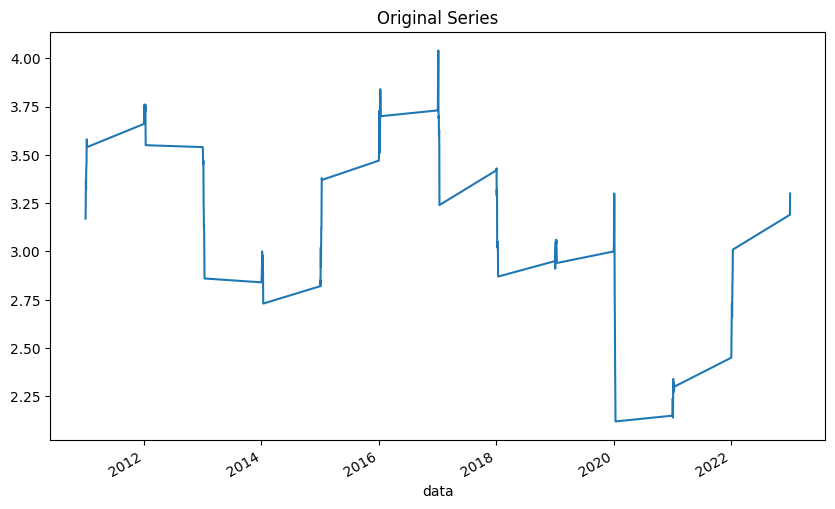

In [12]:
df['valor'].plot(figsize=(10,6)).set_title('Original Series')

In [134]:
# Valor máximo da inadimplencia
df.max()

valor    4.04
dtype: float64

## Modelo ARIMA

<Figure size 800x600 with 0 Axes>

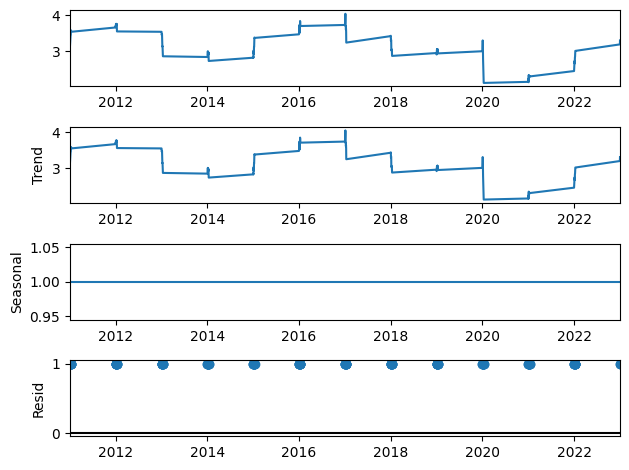

In [13]:
# Tendência, Sazonalidade e Resíduo dos dados
resultado = seasonal_decompose(df, model='multiplicative', period=1)
fig = plt.figure(figsize=(8,6))
fig = resultado.plot()

In [14]:
# Teste de estacionalidade
# Como o valor de p é menor que 0.5, segue que a série não é estacionária

result = adfuller(df.valor.dropna())
print(f'Teste ADF:{result[0]}')
print(f'Teste p-valor:{result[1]}')

Teste ADF:-3.5689212881495402
Teste p-valor:0.006383750293876041


In [16]:
# Descobrindo os melhores parâmetros para o modelo
# Melhor modelo: ARIMA(3,1,0)(2,1,0)[6]             : AIC=-288.382, Time=0.77 sec

fir_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=2.34 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=-234.669, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=-285.451, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=1.53 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=-246.092, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=-284.748, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(0,1,1)[6]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(1,1,0)[6]             : AIC=-270.989, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=-286.751, Time=0.34 sec
 ARIMA(2,1,0)(0,1,0)[6]             : AIC=-244.769, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=-286.300, Time=0.46 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=0.77 sec
 ARIMA(2,1,0)(0,1,1)[6]             : AIC=inf, Time=0.62 sec
 A

In [17]:
# Modelo ARIMA
model = SARIMAX(df, order=(3, 1, 0), seasonal_order=(2, 1, 0, 6))
result_sarimax = model.fit()

In [18]:
# Saida do modelo
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             valor   No. Observations:                  144
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 6)   Log Likelihood                 150.191
Date:                           Fri, 14 Apr 2023   AIC                           -288.382
Time:                                   12:42:27   BIC                           -270.862
Sample:                                        0   HQIC                          -281.262
                                           - 144                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2643      0.089      2.983      0.003       0.091       0.438
ar.L2          0.1164      0.095      1.229      0.219      -0.069       0.302
ar.L3          0.1773      0.074      2.395      0.017       0.032       0.322
ar.S.L6       -0.6237      0.087     -7.158      0.000      -0.794      -0.453
ar.S.L12      -0.1267      0.092     -1.371      0.171      -0.308       0.054
sigma2         0.0064      0.001      9.483      0.000       0.005       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.32
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               2.16   Skew:                            -0.30
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Fazendo as predições com o modelo gerado
predic = result_sarimax.get_prediction(start=-12)
predic_med = predic.predicted_mean

In [20]:
# Intervalos de Confiança inferior e superior
interval_conf = predic.conf_int()
limit_inf = interval_conf.iloc[:,0]
limit_sup = interval_conf.iloc[:,1]
limit_inf[0], limit_sup[0] 

(2.307576020107836, 2.6216572264126268)

In [21]:
# Data da predição
datas_prev = np.asarray(predic_med.index)
datas = np.asarray(df.index)

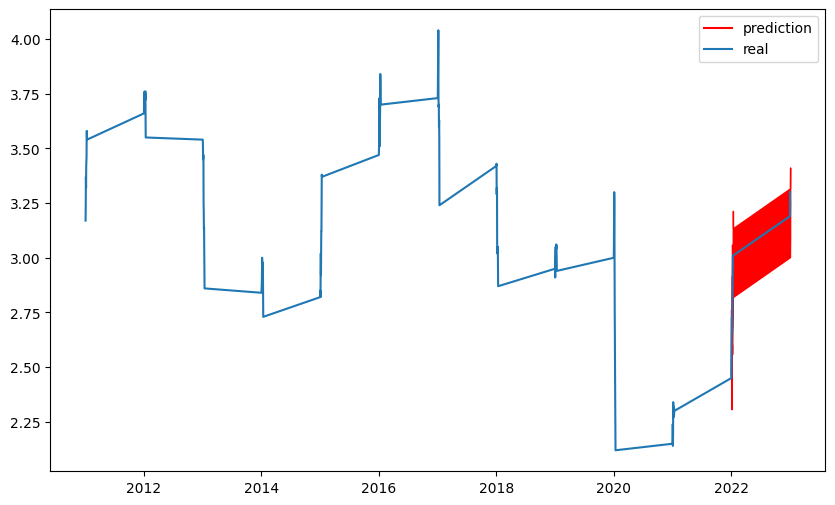

In [22]:
# Plotando o resultado da predição
plt.figure(figsize=(10,6))
plt.plot(datas_prev, predic_med.values, color='red', label='prediction')
plt.fill_between(datas_prev, limit_inf, limit_sup, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [23]:
# Calculo da raiz do erro quadratico
rmse_sarima = sqrt(mean_squared_error(df[-12:].values, predic_med.values))
print(rmse_sarima)

0.05611642002121391


In [130]:
# Tamanho da nova predição
forecast = result_sarimax.get_forecast(steps=12)
forecast_med = forecast.predicted_mean
forecast_med.size

12

In [146]:
# Intervalos de Confiança inferior e superior
interval_conf_forecast = forecast.conf_int()
interval_inf_forecast = interval_conf_forecast.iloc[:,0]
interval_sup_forecast = interval_conf_forecast.iloc[:,1]
interval_inf_forecast[144], forecast_med[144], interval_sup_forecast[144]

(3.22085136934896, 3.3778919725013554, 3.534932575653751)

In [132]:
# Datas das novas predições
datas_forecast = np.asarray(predic_med.index)
pred_dates = np.asarray(predic_med.index)

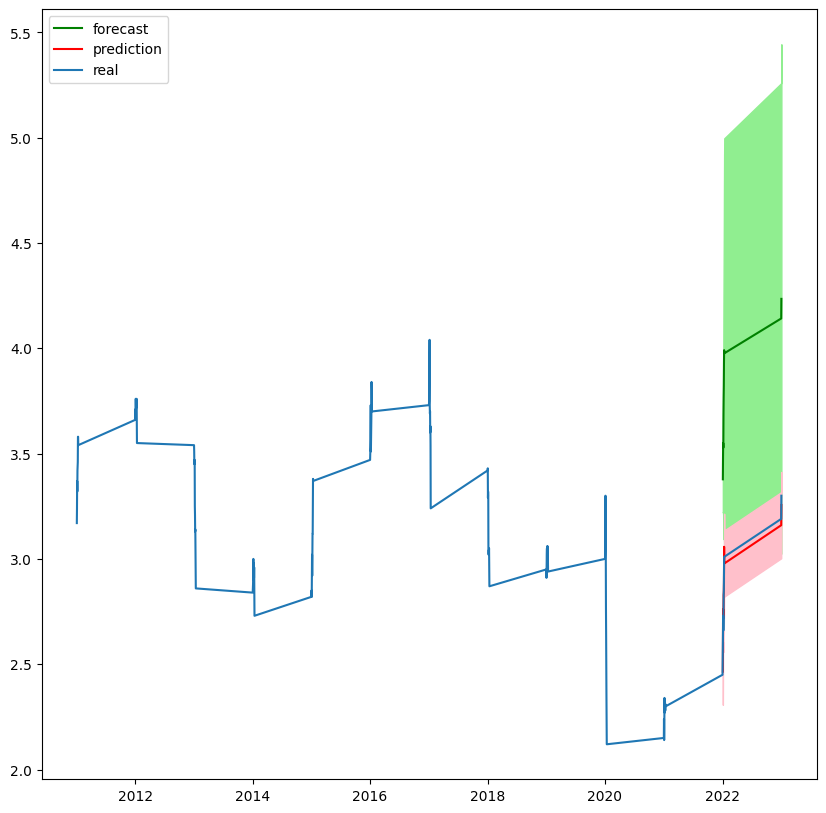

In [133]:
# Plotando o resultado da nova predição
dates = np.asarray(df.index)
plt.figure(figsize=(10,10))
plt.plot(datas_forecast, forecast_med.values, color='green', label='forecast')
plt.fill_between(datas_forecast, interval_inf_forecast, interval_sup_forecast, color='lightgreen')

plt.plot(datas_prev, predic_med.values, color='red', label='prediction')
plt.fill_between(datas_prev, limit_inf, limit_sup, color='pink')

plt.plot(dates, df.values, label='real')
plt.legend(loc='upper left')
plt.show()

### Podemos perceber que a taxa de inadimplência estará aumentando de forma considerável nos próximos 12 meses. Ultrapassando os limites máximos que houveram entre os anos de 2016 e 2017.

### Podemos perceber também olhando para o gráfico de tendência que, a serie possui uma tendência de crescimento, que é seguido de uma queda.